In [1]:
import sys
from pyofss.modules.nonlinearity import calculate_gamma
from pyofss.domain import lambda_to_omega
import os.path

OpenclFibre is not activated, check if pyopencl and reikna modules are installed


In [2]:

from pyofss import Domain, System, Gaussian, Fibre, Filter, Splitter, FibrePlotter
from pyofss import temporal_power, spectral_power, lambda_to_nu, nu_to_lambda
from pyofss import single_plot, map_plot, waterfall_plot, labels
from pyofss.field import energy, max_peak_params, spectrum_width_params

%matplotlib

Using matplotlib backend: Qt5Agg


In [3]:
F1 = 2.4955487496687283
F2 = -2.8965960926639127
FW1 = (Domain.vacuum_light_speed/(1040**2))*4
FW2 = (Domain.vacuum_light_speed/(1030**2))*4
C1 = 0.4
C2 = 0.9
E1 = 56.40074263294333
E2 = 28.145806110547863
L3 = 0.8
L6 = 0.8
SSG = 45
G1 = 4
G2 = 4
N = 1

In [4]:
Esat_1 = E1                     # 9.15nJ
Esat_2 = E2                   # 36.6nJ
La_1 = 2.5*1e-3                  # 2.5m
La_2 = 2.5*1e-3                  # 2.5m
Lp_1 = 0.8*1e-3                                 # 0.8m
Lp_2 = L3*1e-3                                 # 0.8m
Lp_3 = 0.8*1e-3                                 # 0.8m
Lp_4 = L6*1e-3                                 # 0.8m
step_size = 8*1e-7
small_signal_gain = SSG
N_cycles = int(N)
gamma_passive = G1
gamma_active = G2
# peak_power = 50.
# peak_width = 3.
# peak_C = 100.

peak_power = 1000.
peak_width = 10.
peak_C = 300.
local_error = 1e-5

In [5]:
domain = Domain(samples_per_bit=2**15, bit_width=400.0,
                total_bits=1, centre_nu=lambda_to_nu(1035))

gaussian = Gaussian(name="initial_pulse", peak_power=peak_power,
                    width=peak_width, C=peak_C, using_fwhm=True)
A = gaussian.generate(domain.t)
E = energy(A, domain.t)

In [49]:

sys = System(domain, A)
Dir = "newDir"
import numpy as np
for i in range(N_cycles):
    cycleDir = os.path.join(Dir, f'cycle{int(i)}')
    sys.add(Filter(name="filter_1", width_nu=(FW1), offset_nu=(F1),
                   m=1, channel=0, using_fwhm=True, type_filt="reflected"))
    sys.add(Fibre(name="2_active_fibre", length=La_1, gamma=gamma_active, beta=np.array(
        [0, 0, 24.9]), total_steps=int(La_1/step_size), traces=100, local_error=local_error, method='ss_symmetric', cycle=f'cycle{int(i)}', small_signal_gain=small_signal_gain, E_sat=Esat_1, lamb0=1035., bandwidth=40., dir=cycleDir, save_represent="both"))
    sys.add(Fibre(name="2_active_fibre", length=La_1, gamma=gamma_active, beta=np.array(
        [0, 0, 24.9]), total_steps=int(La_1/step_size), traces=100, local_error=local_error, method='ss_symmetric', cycle=f'cycle{int(i)}', small_signal_gain=small_signal_gain, E_sat=Esat_1, lamb0=1035., bandwidth=40., dir=cycleDir, save_represent="both"))

sys.run()

amplifier length equals 0.0025
YDF lanmbda = 1035.0 nm
YDF bandwidth = 40.0 nm
amplifier length equals 0.0025
YDF lanmbda = 1035.0 nm
YDF bandwidth = 40.0 nm


d:\ks\programs\pyofss\pyofss\modules\storage.py:104: UserWarning: Directory is not empty
  warnings.warn("Directory is not empty")


max value in factorArray: 1.0, at 1035.0 nm
Caching linear factor
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain a

d:\ks\programs\pyofss\pyofss\modules\storage.py:443: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  As = np.vstack(


max value in factorArray: 1.0, at 1035.0 nm
Caching linear factor
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain a

In [13]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
# import pyarrow as pa

from pyofss import Domain, System, Gaussian, Fibre, Filter, Splitter, FibrePlotter
from pyofss import temporal_power, spectral_power, lambda_to_nu, nu_to_lambda
plt.clf()
plt.plot(domain.t, temporal_power(sys.field))

In [48]:
sys1 = System(domain, A)
Dir = "newDir"
import numpy as np
for i in range(N_cycles):
    cycleDir = os.path.join(Dir, f'cycle{int(i)}')
    sys1.add(Filter(name="filter_1", width_nu=(FW1), offset_nu=(F1),
                   m=1, channel=0, using_fwhm=True, type_filt="reflected"))
    sys1.add(Fibre(name="2_active_fibre", length=La_1, gamma=gamma_active, beta=np.array(
        [0, 0, 24.9]), total_steps=int(La_1/step_size), traces=100, local_error=local_error, method='ss_symmetric', cycle=f'cycle{int(i)}', small_signal_gain=small_signal_gain, E_sat=Esat_1, lamb0=1035., bandwidth=100., dir=cycleDir, save_represent="both"))

sys1.run()

amplifier length equals 0.0025
YDF lanmbda = 1035.0 nm
YDF bandwidth = 100.0 nm


d:\ks\programs\pyofss\pyofss\modules\storage.py:104: UserWarning: Directory is not empty
  warnings.warn("Directory is not empty")


max value in factorArray: 1.0, at 1035.0 nm
Caching linear factor
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain a

d:\ks\programs\pyofss\pyofss\modules\storage.py:443: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  As = np.vstack(


KeyboardInterrupt: 

In [14]:
plt.clf()
plt.plot(domain.nu, spectral_power(sys.field))
#plt.plot(domain.nu, spectral_power(sys1.field))
plt.plot(domain.nu, spectral_power(A))

In [45]:
import pandas as pd
df = pd.read_csv("LorentzFactorArray.csv", index_col=[0])
df_true = pd.read_csv("spectr_YDF_0.dat", index_col=[0], delimiter="\t")

In [46]:
df_true

,9.85536e-20,0.01835808
1205.315,,
1205.1940,7.281516e-20,0.018380
1205.0730,3.534176e-20,0.018402
1204.9520,1.992107e-20,0.018424
1204.8310,4.042354e-20,0.018446
1204.7100,7.847756e-20,0.018469
...,...,...
907.1733,5.039518e-20,0.018460
907.1047,2.024027e-20,0.018438
907.0361,2.598048e-20,0.018415


In [47]:
plt.clf()
plt.plot(domain.Lambda, df[df.columns[0]])
plt.plot(df_true.index.values, df_true[df_true.columns[1]])

In [30]:
min(df[df.columns[1]])

0.0183309594494699

In [20]:
np.argmax(df.values)

65534

In [21]:
len(df.values)

32768

In [15]:
plt.plot(domain.nu, df.values) 

In [9]:
sys.run()

max value in factorArray: 1.0, at 1035.0 nm
Caching linear factor
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain array on linearity step
use gain a

d:\ks\programs\pyofss\pyofss\modules\storage.py:443: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  As = np.vstack(


In [16]:
sys.modules

In [12]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
# import pyarrow as pa

from pyofss import Domain, System, Gaussian, Fibre, Filter, Splitter, FibrePlotter
from pyofss import temporal_power, spectral_power, lambda_to_nu, nu_to_lambda
plt.clf()
plt.plot(domain.t, temporal_power(sys.field))

In [10]:
plt.show()

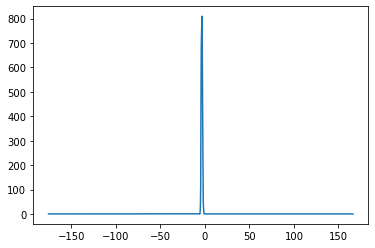